### Data set
Amazon mobile electronics product review data set

Imported data from Tensorflow data sets - amazon_us_reviews

 Description- Dataset consists single language review 'english' and from a single market place 'US'

### <span style="color:green">Importing all necessary libraries</span>

In [1]:
#!pip install WordCloud
#!pip install matplotlib
import pandas as pd
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
import missingno as msno
import warnings
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer

In [2]:
df = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.csv', on_bad_lines='skip')
df_2 = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.csv', on_bad_lines='skip') # Visualization df only used for visualizing insights from all columns

df.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


## Understanding the data set

In [3]:
df.shape

(104852, 16)

In [4]:
df.isnull().sum()

Unnamed: 0           0
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          2
helpful_votes        2
total_votes          2
vine                 2
verified_purchase    2
review_headline      4
review_body          4
review_date          2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104852 entries, 0 to 104851
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         104852 non-null  int64  
 1   marketplace        104852 non-null  object 
 2   customer_id        104852 non-null  int64  
 3   review_id          104852 non-null  object 
 4   product_id         104852 non-null  object 
 5   product_parent     104852 non-null  int64  
 6   product_title      104852 non-null  object 
 7   product_category   104852 non-null  object 
 8   star_rating        104850 non-null  float64
 9   helpful_votes      104850 non-null  float64
 10  total_votes        104850 non-null  float64
 11  vine               104850 non-null  object 
 12  verified_purchase  104850 non-null  object 
 13  review_headline    104848 non-null  object 
 14  review_body        104848 non-null  object 
 15  review_date        104850 non-null  object 
dtypes:

### Distribution of values in columns

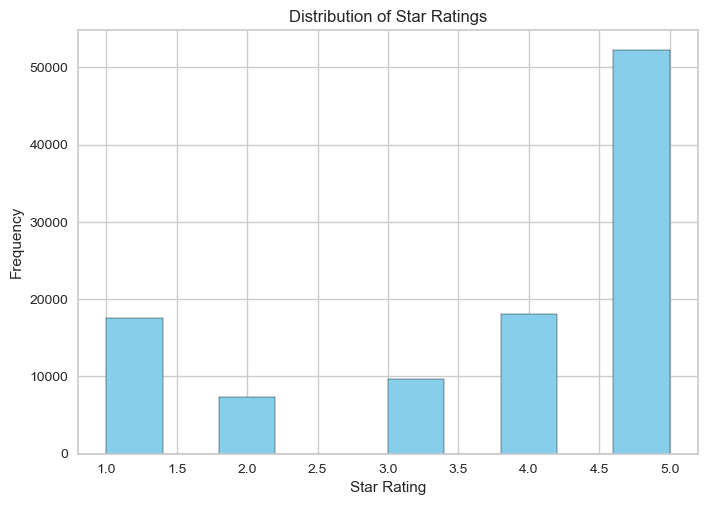

In [6]:
import matplotlib.pyplot as plt

df['star_rating'].hist(color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')

# Show the plot
plt.show()

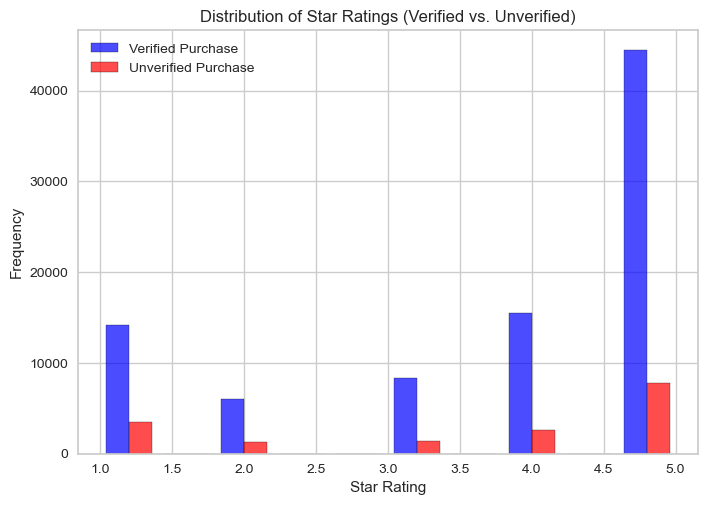

In [7]:
import matplotlib.pyplot as plt

verified_reviews = df[df['verified_purchase'] == 'Y']
unverified_reviews = df[df['verified_purchase'] == 'N']

# Plot histograms
plt.hist([verified_reviews['star_rating'], unverified_reviews['star_rating']], color=['blue', 'red'], alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings (Verified vs. Unverified)')

# Add a legend
plt.legend(['Verified Purchase', 'Unverified Purchase'])

# Show the plot
plt.show()


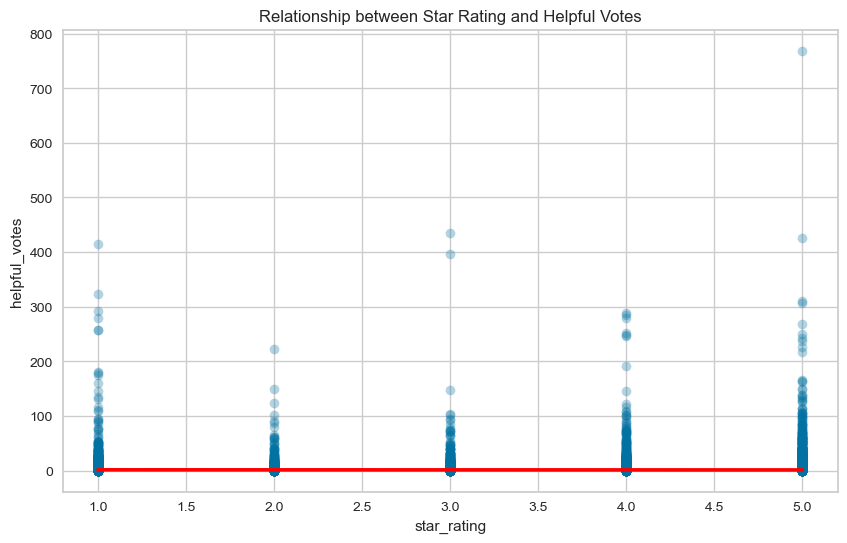

In [8]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Relationship between star rating and helpful votes
plt.figure(figsize=(10, 6))
sns.regplot(x='star_rating', y='helpful_votes', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship between Star Rating and Helpful Votes')
plt.show()

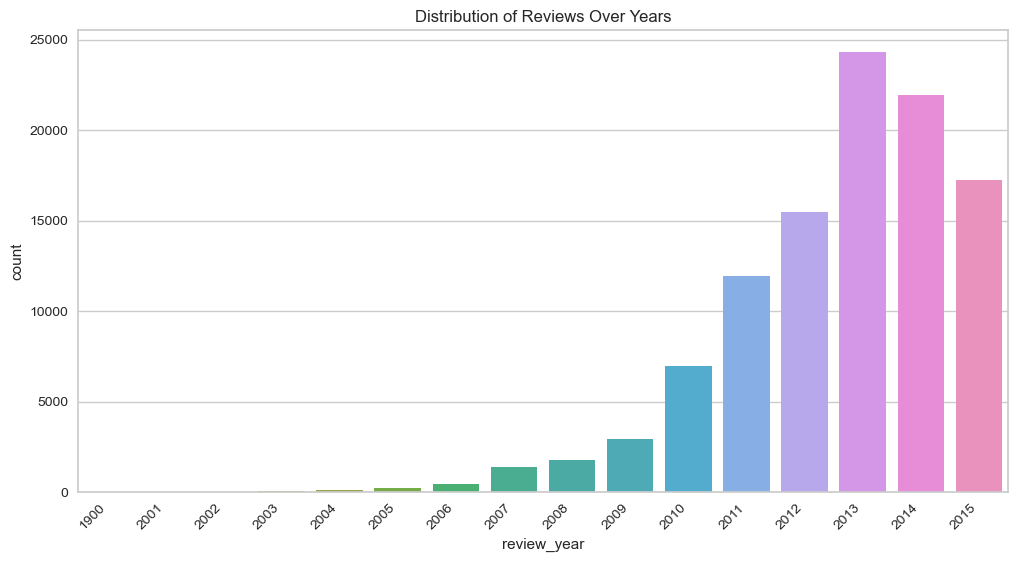

In [9]:
df['review_date'] = pd.to_datetime(df['review_date'])
df['review_year'] = df['review_date'].dt.year.fillna(1900).astype(int)

plt.figure(figsize=(12, 6))
sns.countplot(x='review_year', data=df.sort_values('review_year'))
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Reviews Over Years')
plt.show()


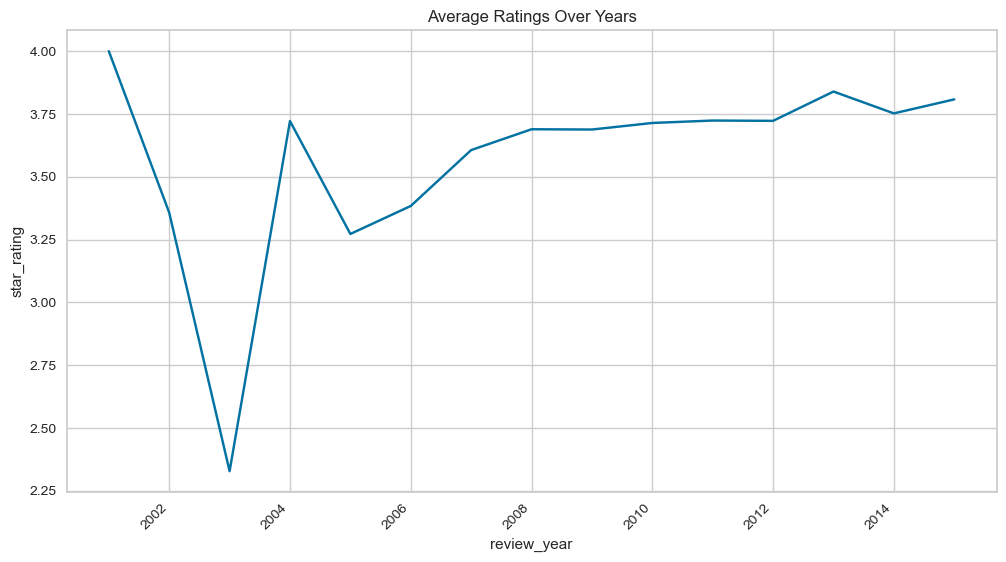

In [10]:

df['review_date'] = pd.to_datetime(df['review_date'])
df['review_year'] = df['review_date'].dt.year.fillna(1900).astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x='review_year', y='star_rating', data=df, ci=None)  # ci=None to suppress confidence intervals
plt.xticks(rotation=45, ha='right')
plt.title('Average Ratings Over Years')
plt.show()

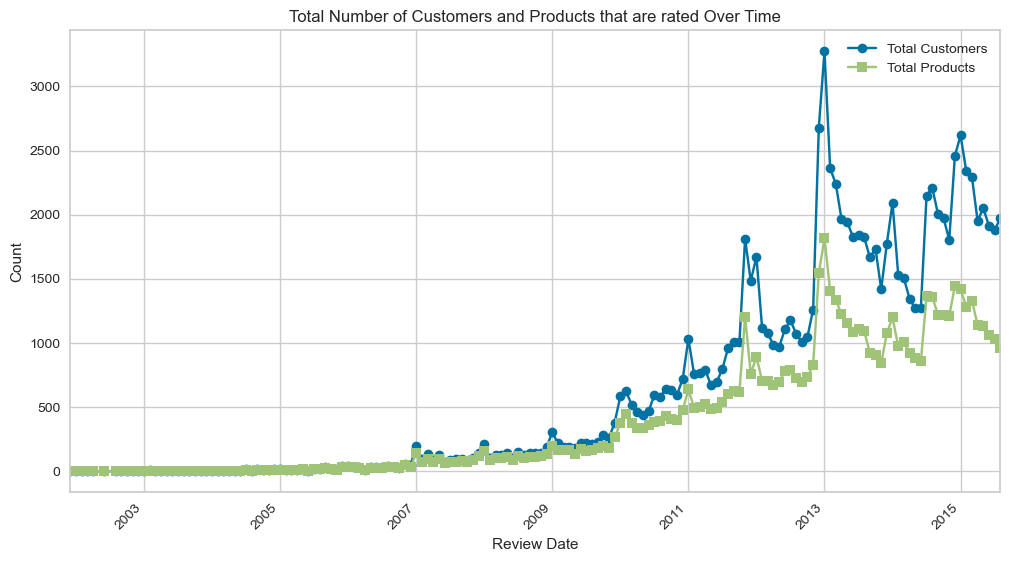

In [11]:
# Group by 'review_date' and count the number of unique customers and products
customers_over_time = df.groupby(df['review_date'].dt.to_period("M"))['customer_id'].nunique()
products_over_time = df.groupby(df['review_date'].dt.to_period("M"))['product_id'].nunique()

# Plot the total number of customers and products over time
plt.figure(figsize=(12, 6))
customers_over_time.plot(marker='o', linestyle='-', label='Total Customers')
products_over_time.plot(marker='s', linestyle='-', label='Total Products')

plt.title('Total Number of Customers and Products that are rated Over Time')
plt.xlabel('Review Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# A) Data Wrangling

In [12]:
df = df[['star_rating','review_body']]

### Since minimum number of rows are missing decided to exclude that for further analysis

In [13]:
#missing values dropping
df.dropna(subset=['star_rating', 'review_body'], inplace=True)
df_2.dropna(subset=['star_rating', 'review_body'], inplace=True)

In [14]:
df.head()

,star_rating,review_body
0,5.0,"As advertised. Everything works perfectly, I'm..."
1,5.0,it's great
2,5.0,These work great and fit my life proof case fo...
3,4.0,Work very well but couldn't get used to not he...
4,2.0,"Be careful with these products, I have bought ..."


### Setting up label column for training and testing purposes

In [15]:
def review_label(df):
    df['review_label'] = df['star_rating'].apply(lambda x: 1 if x > 3 else 0)
    return df

# Call the function with your DataFrame 'df'
df = review_label(df)

# Visualization df
def review_label(df):
    df_2['review_label'] = df_2['star_rating'].apply(lambda x: 1 if x > 3 else 0)
    return df_2

# Call the function with your DataFrame 'df'
df_2 = review_label(df_2)

In [16]:
df.head()

,star_rating,review_body,review_label
0,5.0,"As advertised. Everything works perfectly, I'm...",1
1,5.0,it's great,1
2,5.0,These work great and fit my life proof case fo...,1
3,4.0,Work very well but couldn't get used to not he...,1
4,2.0,"Be careful with these products, I have bought ...",0


In [17]:
df = df.drop('star_rating',axis = 1)

### Final Data frame before text preprocessing 

In [18]:
df.head()
df[df['review_label'] == 0]

,review_body,review_label
4,"Be careful with these products, I have bought ...",0
5,"It appears to be good, but I'm still waiting f...",0
6,"First one arrived as a brick. Wouldn't work, ...",0
11,If what you want is a continuous tone piezo - ...,0
13,Sucks,0
...,...,...
104838,I purchased this product because of the reputa...,0
104839,This machine has broken down on me 4 times dur...,0
104840,"I received this as a gift, and have had it ser...",0
104844,I purchased this product based on the reviews ...,0


In [19]:
df.head()

,review_body,review_label
0,"As advertised. Everything works perfectly, I'm...",1
1,it's great,1
2,These work great and fit my life proof case fo...,1
3,Work very well but couldn't get used to not he...,1
4,"Be careful with these products, I have bought ...",0


In [20]:
df.shape

(104848, 2)

In [21]:
df_2.shape

(104848, 17)

# Text pre-processing

## I.Removing tokenizing, removing stop words, stemming 

In [22]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
stopwords = stopwords.words('english')

In [23]:
'''#to be deleted
df = df[:20000]
df_2 = df_2[:20000]'''

'#to be deleted\ndf = df[:20000]\ndf_2 = df_2[:20000]'

In [24]:
import re
from nltk.corpus import stopwords

def process_review_body(row):
    try:
        review = re.sub('[^a-zA-Z]', ' ', row['review_body'])
        review = review.lower()
        review = review.split()
        review = [word for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        return review
    except KeyError:
        print(f"Skipping row {row.name} due to KeyError.")
        return None


df['review_body'] = df.apply(process_review_body, axis=1)

# Filter out rows where processing failed (resulted in None)
df = df.dropna(subset=['review_body'])

# Access the processed reviews
corpus = df['review_body'].tolist()

### Corpus of words formed out of the review text

In [25]:
corpus

['advertised everything works perfectly happy camera matter fact going buy another one nd car',
 'great',
 'work great fit life proof case iphone',
 'work well get used hearing anything ear v plugged',
 'careful products bought several cameras image pretty decent battery hold charge',
 'appears good still waiting items radio batteries charger go stars',
 'first one arrived brick work charge useless exchanged new one works advertised',
 'worked great vacation',
 'good item provide sound like',
 'love recorder bought obviously tape cassette way play br spent amazing afternoon listening mom passed away tell minute christmas story nicholas two daughters many moons ago wonderful afternoon laughter tears br thank providing time spend afternoon mom',
 'great sound great battery beach work park anywhere battery lasts',
 'want continuous tone piezo e beeper one would get maybe stars possibly dock one star bit quiet rated sound level however wanted thing described listing e buzzer example someth

### Displaying the frequency distribution of words in the corpus

<FreqDist with 100341 samples and 104848 outcomes>


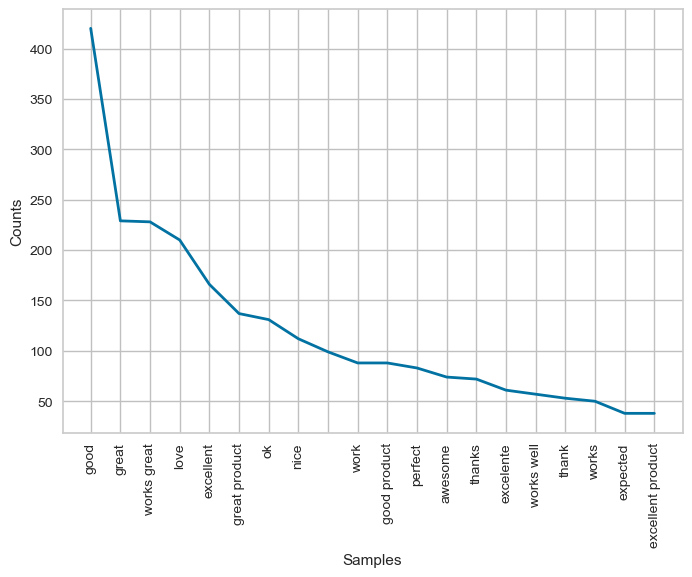

<Axes: xlabel='Samples', ylabel='Counts'>

In [26]:
from nltk import FreqDist


frequency_distribution = FreqDist(corpus)

# Print the frequency distribution
print(frequency_distribution)

# Plot the most common 20 words
frequency_distribution.plot(20, cumulative=False)



### Stemming

In [27]:
# Stemming function using NLTK's Porter Stemmer
def stem_text(text):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Apply stemming to the entire review_body column
df['review_body'] = df['review_body'].apply(stem_text)

### Removing repeating letter

In [28]:
import re

def remove_repeating_letters(text):
    # Define a regex pattern to match consecutive repeating letters (more than 3)
    pattern = re.compile(r"\b(\w*?(\w)\2{2,})\w*\b")
    
    # Remove words with consecutive repeating letters in the text
    return pattern.sub('', text)

# Apply the function to the 'review_body' column and update the DataFrame
df['review_body'] = df['review_body'].apply(remove_repeating_letters)

### Deriving target variable

In [29]:
# Mapping 0 and 1 to positive and negative labels
import pandas as pd
df['review_category'] = df['review_label'].map({0: 'negative', 1: 'positive'})
df 

# Mapping 0 and 1 to positive and negative labels
import pandas as pd
df_2['review_category'] = df_2['review_label'].map({0: 'negative', 1: 'positive'})


In [30]:
df.head()

,review_body,review_label,review_category
0,advertis everyth work perfectli happi camera m...,1,positive
1,great,1,positive
2,work great fit life proof case iphon,1,positive
3,work well get use hear anyth ear v plug,1,positive
4,care product bought sever camera imag pretti d...,0,negative


### Bag of Words

In [31]:
# Extract the first review
first_review = df['review_body'].iloc[0]

# Bag of Words (BoW) Vectorizer
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(df['review_body'])
bow_feature_names = bow_vectorizer.get_feature_names_out()
bow_feature_names

array(['aa', 'aabsolutli', 'aac', ..., 'zycabl', 'zyxel', 'zz'],
      dtype=object)

### II. Visualizing how vectorizers give importances to words

In [32]:


# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df['review_body'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Word Clouds
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

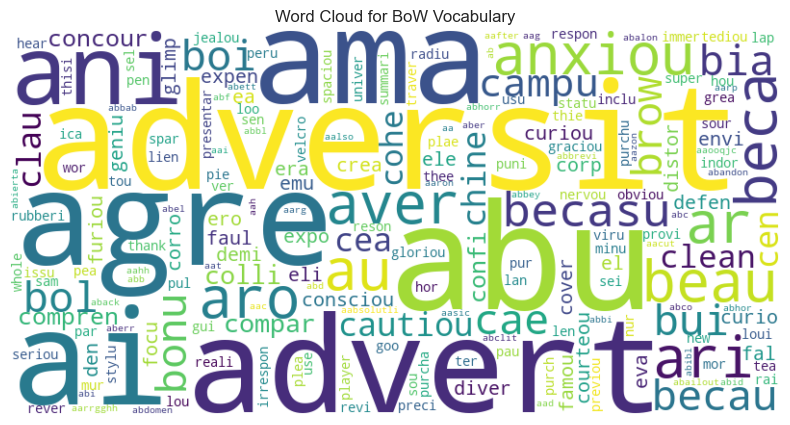

In [33]:
# Word Cloud for BoW vocabulary
plot_word_cloud(' '.join(bow_feature_names), 'Word Cloud for BoW Vocabulary')

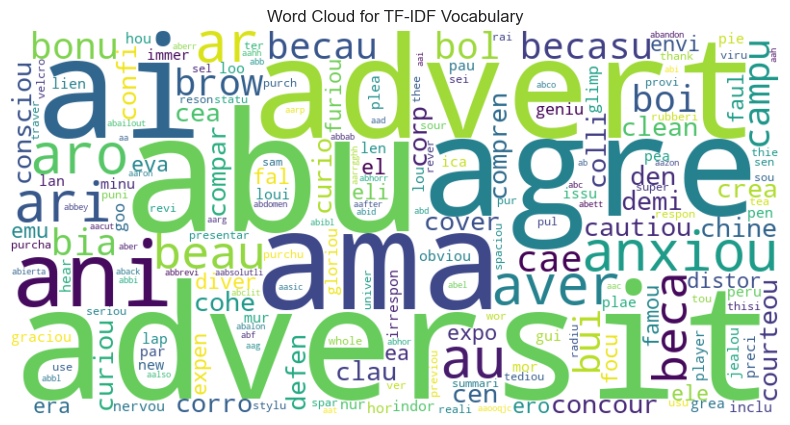

In [34]:
# Word Cloud for TF-IDF vocabulary
plot_word_cloud(' '.join(tfidf_feature_names), 'Word Cloud for TF-IDF Vocabulary')

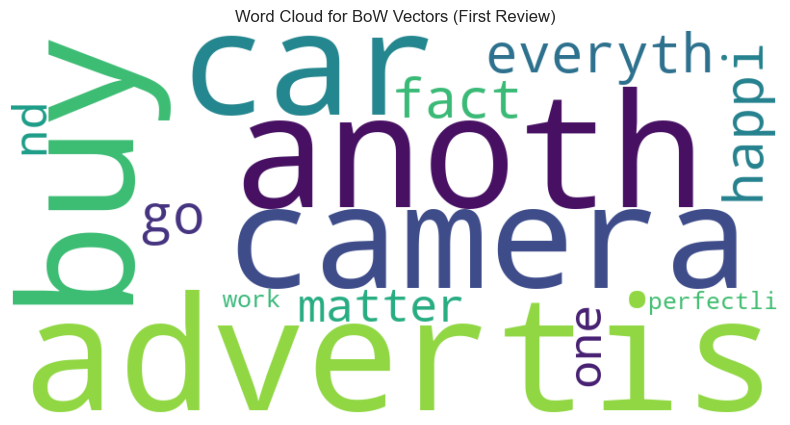

In [35]:
# Word Cloud for BoW vectors of the first review
plot_word_cloud(' '.join([word for word in bow_feature_names if bow_vectors[0, bow_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for BoW Vectors (First Review)')


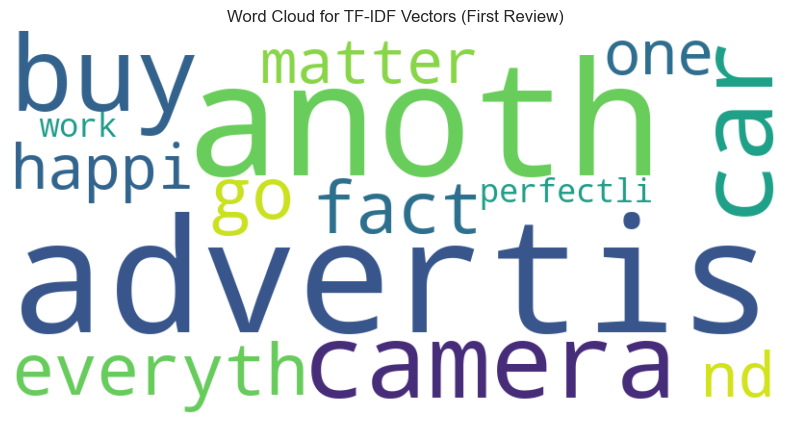

In [36]:
# Word Cloud for TF-IDF vectors of the first review
plot_word_cloud(' '.join([word for word in tfidf_feature_names if tfidf_vectors[0, tfidf_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for TF-IDF Vectors (First Review)')

# B) Modeling & Performance - Implementation of Vectorization and Models

### Assigning the target as y and other columns as x. And further dividing them into train set and test set

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


X= df['review_body']
y = df['review_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Implementing Bag of Words Vectorization 

### Analyzing the top 10 terms sorted by count_Score

In [91]:
# X_train_vectorized.sum(axis=0)
tf_values = X_train_vectorized.sum(axis=0)
score = [x for x in tf_values.flat] 
score_li = []
for each in score:
    score_li.append(each)
feature = vectorizer.get_feature_names_out()
feature_li = [each for each in feature]
df_tf = pd.DataFrame({'Term': feature_li,
                         'Score': score_li})

df_tf_sorted = df_tf.sort_values(by='Score', ascending=False)

pd.DataFrame(df_tf_sorted.head(10))


,Term,Score
3209,br,52682
30117,work,36603
28695,use,32525
11374,great,26224
18428,one,25231
4053,case,24143
20652,product,21471
11166,good,20902
30185,would,19306
15283,like,19188


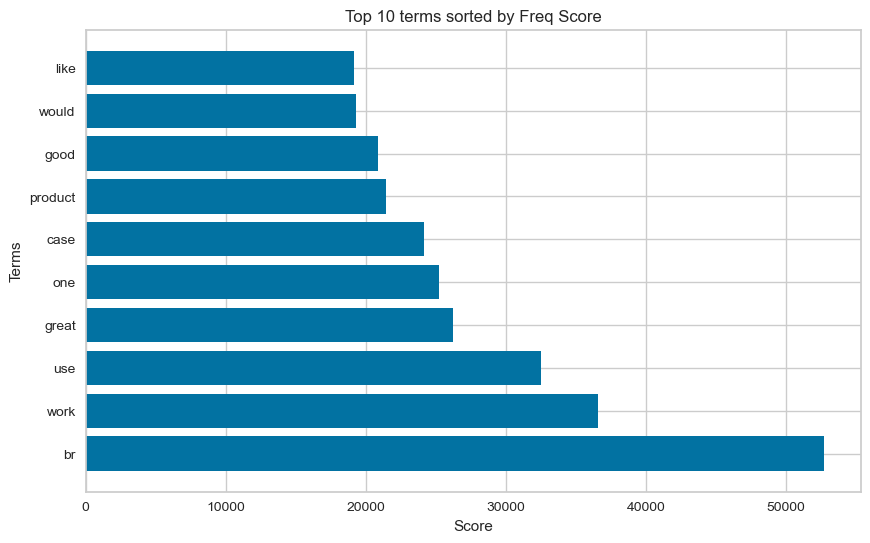

In [92]:
plt.figure(figsize=(10, 6))
plt.barh(df_tf_sorted['Term'].head(10), df_tf_sorted['Score'].head(10), align='center', )
plt.ylabel('Terms')
plt.xlabel('Score')
plt.title('Top 10 terms sorted by Freq Score'.format(10))
plt.show()

### Naive Bayes model - Bag of words

In [93]:
from sklearn.metrics import confusion_matrix
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)
y_pred_nb_bow = nb_classifier.predict(X_test_vectorized)

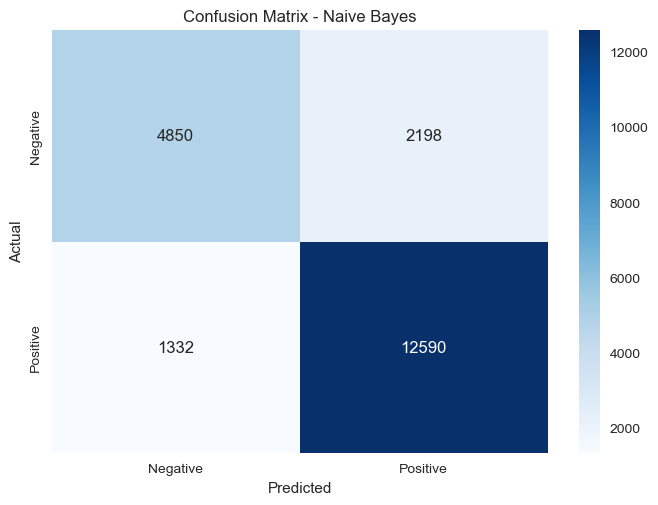

In [94]:
# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb_bow)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [95]:
accuracy = accuracy_score(y_test, y_pred_nb_bow)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb_bow))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_nb_bow)
print("Confustion Matrix\n", cm)

Accuracy: 0.8316642823080591

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.69      0.73      7048
    positive       0.85      0.90      0.88     13922

    accuracy                           0.83     20970
   macro avg       0.82      0.80      0.81     20970
weighted avg       0.83      0.83      0.83     20970

Confustion Matrix
 [[ 4850  2198]
 [ 1332 12590]]


### GridSearchCV and XGBoost - Bag of words

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('XGBClassifier', XGBClassifier())
])


# Define the hyperparameters to search for both CountVectorizer and MultinomialNB
param_grid = {
#     'countvectorizer__max_features': [X_train_vectorized.shape[1]-i*(X_train_vectorized.shape[1]//5) for i in range(4,-1, -1)],
# #          'countvectorizer__ngram_range' : [(1,1), (1,2), (1,3)], 
#     'countvectorizer__max_df' : [0.75, 1.0],
#     'countvectorizer__min_df' : [0.2, 0.4],
    'XGBClassifier__learning_rate': [0.01, 0.1, 0.2],
    'XGBClassifier__n_estimators': [50, 100, 200],
    'XGBClassifier__max_depth': [3, 5, 7],
    'XGBClassifier__subsample': [0.8, 0.9, 1.0],
    'XGBClassifier__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train[:10000], y_train[:10000])


print("Best parameters: ", grid_search.best_params_)

ValueError: 
All the 810 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saikiranpilli/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saikiranpilli/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/saikiranpilli/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/saikiranpilli/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/saikiranpilli/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1467, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['negative' 'positive']


In [ ]:
bow_params = {}
xgb_params = {}

for k, v in grid_search.best_params_.items():
    if 'countvectorizer' in k:
        bow_params[k[k.find('__')+2:]] = v
    elif 'XGBClassifier' in k:
        xgb_params[k[k.find('__')+2:]] = v

In [ ]:
vectorizer = CountVectorizer(bow_params)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = XGBClassifier(xgb_params)

classifier.fit(X_train_vectorized, y_train)

y_pred_gs_bg = classifier.predict(X_test_vectorized)

In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_gs_bg)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred_gs_bg)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gs_bg))


### GridSearchCV and XGBoost - Bag of words - Using hyperparameters

In [ ]:
vectorizer = CountVectorizer(**bow_params)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = XGBClassifier(**xgb_params)

classifier.fit(X_train_vectorized, y_train)

y_pred_gs_bg_best = classifier.predict(X_test_vectorized)

In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_gs_bg_best)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred_gs_bg_best)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gs_bg_best))


### Random Forest - Bag of words

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

classifier.fit(X_train_vectorized, y_train)

y_pred_rf_bow = classifier.predict(X_test_vectorized)



In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_bow)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf_bow)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_bow))


## Top 20 features derived from trained model (Naive Bayes)

In [ ]:
# Get feature importances from the trained model
feature_importances = classifier.feature_importances_
features = vectorizer.get_feature_names_out()

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
# Plot the top N feature importances
top_n = 20
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx[:top_n]], align='center')
plt.xticks(range(top_n), features[sorted_idx[:top_n]], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

## Implementing TFidf Vectorization 

In [ ]:
vectorizer = TfidfVectorizer(strip_accents = 'ascii', lowercase = True, max_features=700)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_train_vectorized.shape

### Deriving the vocabulary used for building vectors

In [ ]:
vectorizer.get_feature_names_out()

### Analyzing the top 10 terms sorted by TFIDF_Score

In [ ]:
tfidf_values = X_train_vectorized.sum(axis=0)
TFIDF_Score = [x for x in tfidf_values.flat] 

df_tfidf = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                         'TFIDF_Score': TFIDF_Score,
                         'IDF': vectorizer.idf_})

df_tfidf_sorted = df_tfidf.sort_values(by='TFIDF_Score', ascending=False)

pd.DataFrame(df_tfidf_sorted.head(10))


In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df_tfidf_sorted['Term'].head(10), df_tfidf_sorted['TFIDF_Score'].head(10), align='center', )
# plt.xticks(df_tfidf_sorted['Term'].head(10))
plt.ylabel('Terms')
plt.xlabel('TFIDF Score')
plt.title('Top 10 terms sorted by TFIDF_Score'.format(top_n))
plt.show()

### Naive Bayes model - Tfidf

In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

y_pred_nb_tf = classifier.predict(X_test_vectorized)

In [ ]:

cm_rf = confusion_matrix(y_test, y_pred_nb_tf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred_nb_tf)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb_tf))


In [ ]:
classifier.feature_count_

### GridSearchCV and XGBoost - Tfidf

In [ ]:
vectorizer = CountVectorizer(bow_params)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = XGBClassifier(xgb_params)

classifier.fit(X_train_vectorized, y_train)

y_pred_gs_tf = classifier.predict(X_test_vectorized)

In [ ]:

cm_rf = confusion_matrix(y_test, y_pred_gs_tf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_gs_tf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_gs_tf)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gs_tf))


### GridSearchCV and XGBoost - Tfidf - Hyperparameters

In [ ]:
vectorizer = CountVectorizer(**bow_params)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = XGBClassifier(**xgb_params)

classifier.fit(X_train_vectorized, y_train)

y_pred_gs_tf_best = classifier.predict(X_test_vectorized)

In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_gs_tf_best )
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GridSearchCV')
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred_gs_tf_best )
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gs_tf_best ))


### Random Forest - Tf-idf

In [ ]:
classifier = RandomForestClassifier()

classifier.fit(X_train_vectorized, y_train)

y_pred_rf_tf = classifier.predict(X_test_vectorized)

In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_tf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf_tf)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tf))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rf_tf)
print("Confustion Matrix\n", cm)

## Top 20 features derived from trained model (Random Forest)

In [ ]:
# Get feature importances from the trained model
feature_importances = classifier.feature_importances_

features = vectorizer.get_feature_names_out()

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
# Plot the top N feature importances
top_n = 20
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx[:top_n]], align='center')
plt.xticks(range(top_n), features[sorted_idx[:top_n]], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()


# C) Insights

## Top 10 products by reivew count

In [ ]:
import seaborn as sns

# Filter for positive reviews
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 10 products with the most positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(10).index

# Filter the DataFrame for the top 10 products
top_positive_df = positive_reviews[positive_reviews['product_title'].isin(top_positive_products)]

# Adjust figure size for better visualization
plt.figure(figsize=(15, 8))

# Limit the length of product titles for better visualization
top_positive_df['product_title'] = top_positive_df['product_title'].apply(lambda x: x[:30] + "..." if len(x) > 30 else x)

# Plot a violin plot
sns.violinplot(x='product_title', y='star_rating', data=top_positive_df, palette='Blues', inner='quartile')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust font size and rotation
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.xlabel('Product Title', fontsize=14)  # Adjust x-axis label font size
plt.ylabel('Star Rating', fontsize=14)  # Adjust y-axis label font size
plt.title('Distribution of Star Ratings for Top 10 Products with Most Positive Reviews', fontsize=16)  # Adjust title font size
plt.show()



## Top 10 reviewers

In [ ]:
customer_review_count = df_2['customer_id'].value_counts().head(10)  # Displaying top 10 customers by review count
customer_review_count.plot(kind='bar', color='lightcoral')
plt.xlabel('Customer ID')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Customers by Review Count')
plt.show()


## Top 4 products with highest count of positive review

In [ ]:
import seaborn as sns

positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 4 products with the highest counts of positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(4)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=top_positive_products.values, y=top_positive_products.index, palette='Blues_d')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Product Title')
plt.title('Top 5 Products with Highest Counts of Positive Reviews')
plt.show()


## Top 5 Best Prodcuts by IDs

In [ ]:
import matplotlib.pyplot as plt


# Filter for positive reviews
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 5 product IDs with the most positive reviews
top_positive_products = positive_reviews['product_id'].value_counts().head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_positive_products, labels=top_positive_products.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Products with Most Positive Reviews')
plt.show()


## Top 5 products with most positive reviews

In [ ]:
import matplotlib.pyplot as plt

# Filter for positive reviews
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 5 product titles with the most positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(5)

# Limit the length of product titles for better visualization
top_positive_products.index = top_positive_products.index.str[:20]  # You can adjust the length as needed

# Adjust figure size for better visualization
plt.figure(figsize=(12, 12))

# Plot the pie chart with product titles as labels
plt.pie(top_positive_products, labels=top_positive_products.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Product Titles with Most Positive Reviews')
plt.show()



# Summary on models and performances(Need to update values)

## The BoW & Naive-Bayes 

- Accuracy- 0.8316
- Precison- 0.87
- Recall- 0.87
- F1-Score- 0.87

## The BoW & Random Forest 

- Accuracy- 0.8705
- Precison- 0.87
- Recall- 0.87
- F1-Score- 0.87

## The Tf-idf & Naive Bayes

- Accuracy- 0.835
- Precison- 0.84
- Recall- 0.83
- F1-Score- 0.83

## The Tf-idf & Random Forest

- Accuracy- 0.8445
- Precison- 0.84
- Recall- 0.83
- F1-Score- 0.83

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Classification reports
report_nb_bow = classification_report(y_test, y_pred_nb_bow, output_dict=True)
report_rf_bow = classification_report(y_test, y_pred_rf_bow, output_dict=True)
report_nb_tf = classification_report(y_test, y_pred_nb_tf, output_dict=True)
report_rf_tf = classification_report(y_test, y_pred_rf_tf, output_dict=True)

# Extracting metrics
classifiers = ['Naive Bayes BoW', 'Random Forest BoW', 'Naive Bayes TF-IDF', 'Random Forest TF-IDF']

accuracy = [report_nb_bow['accuracy'], report_rf_bow['accuracy'], report_nb_tf['accuracy'], report_rf_tf['accuracy']]
precision = [
    report_nb_bow['macro avg']['precision'],
    report_rf_bow['macro avg']['precision'],
    report_nb_tf['macro avg']['precision'],
    report_rf_tf['macro avg']['precision']
]
recall = [
    report_nb_bow['macro avg']['recall'],
    report_rf_bow['macro avg']['recall'],
    report_nb_tf['macro avg']['recall'],
    report_rf_tf['macro avg']['recall']
]
f1_score = [
    report_nb_bow['macro avg']['f1-score'],
    report_rf_bow['macro avg']['f1-score'],
    report_nb_tf['macro avg']['f1-score'],
    report_rf_tf['macro avg']['f1-score']
]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar plot for accuracy
sns.barplot(x=classifiers, y=accuracy, palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Classifier Comparison - Accuracy')
axes[0, 0].set_ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
axes[0, 0].set_ylabel('Accuracy')

# Bar plot for precision
sns.barplot(x=classifiers, y=precision, palette='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Classifier Comparison - Precision')
axes[0, 1].set_ylim(0, 1)  # Set y-axis limit to 0-1 for precision
axes[0, 1].set_ylabel('Precision')

# Bar plot for recall
sns.barplot(x=classifiers, y=recall, palette='Oranges', ax=axes[1, 0])
axes[1, 0].set_title('Classifier Comparison - Recall')
axes[1, 0].set_ylim(0, 1)  # Set y-axis limit to 0-1 for recall
axes[1, 0].set_ylabel('Recall')

# Bar plot for F1-score
sns.barplot(x=classifiers, y=f1_score, palette='Reds', ax=axes[1, 1])
axes[1, 1].set_title('Classifier Comparison - F1-score')
axes[1, 1].set_ylim(0, 1)  # Set y-axis limit to 0-1 for F1-score
axes[1, 1].set_ylabel('F1-score')

plt.tight_layout()
plt.show()


# D) Conclusion:

#### The best performance is achieved by BoW vectorization method with a variation of 0.03 from Tf-idf. But we saw how differently importance to words are given in the form of word clouds, Tf-idf does better job in terms of normalizing repeated words and finding out actual significant words that matter. 

#### In case of this dataset BoW might have performed better but on a high variance data set we can conclude Tf-idf is the best approach. 